## Stochastic Hill Climbing

### Diagrama da Solução

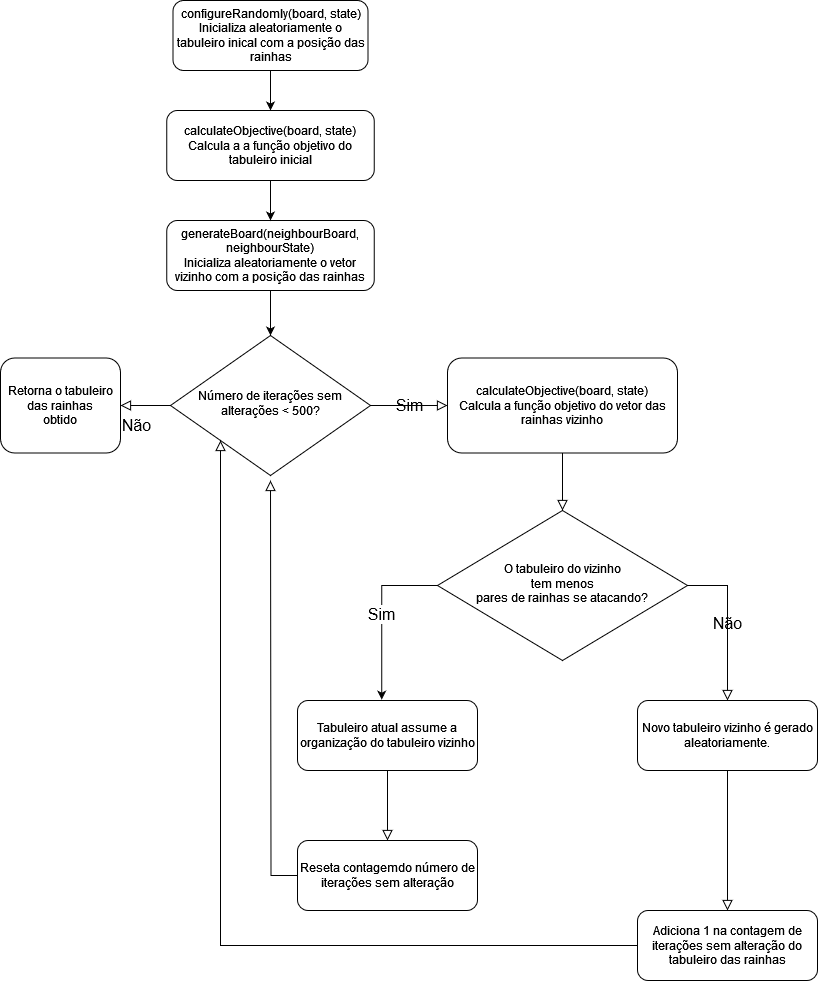

In [68]:
from IPython.display import Image
Image(filename='images\Hill_Climbing_Flow.drawio(1).png') 

Nota: Para permitir reprodutibilidade do experimento apresentado, foi definido uma seed com valor = 10. 

Caso seja de interesse gerar novos resultados, basta alterar ou remover a seed.

    IMPORTANTE: EM CASOS DE ALTERAÇÃO DO CÓDIGO, FAVOR RE-EXECUTAR TODAS AS CÉLULAS ABAIXO DELE. 

In [78]:
# Python3 implementation of the
# above approach
import random
from random import randint
import statistics
import time

SEED=10 # MUDAR SEED AQUI
random.seed(SEED) 

N = 8
# A utility function that configures
# the 2D array "board" and
# array "state" randomly to provide
# a starting point for the algorithm.
def configureRandomly(board, state):

	# Iterating through the
	# column indices
	for i in range(N):

		# Getting a random row index
		state[i] = randint(0, 100000) % N;

		# Placing a queen on the
		# obtained place in
		# chessboard.
		board[state[i]][i] = 1;
	
# A utility function that prints
# the 2D array "board".
def printBoard(board):
	
	for i in range(N):
		print(*board[i])
	

# A utility function that fills
# the 2D array "board" with
# values "value"
def fill(board, value):
	
	for i in range(N):
		for j in range(N):
			board[i][j] = value;
		
# This function calculates the
# objective value of the
# state(queens attacking each other)
# using the board by the
# following logic.
def calculateObjective( board, state):

	# For each queen in a column, we check
	# for other queens falling in the line
	# of our current queen and if found,
	# any, then we increment the variable
	# attacking count.

	# Number of queens attacking each other,
	# initially zero.
	attacking = 0;

	# Variables to index a particular
	# row and column on board.
	for i in range(N):

		# At each column 'i', the queen is
		# placed at row 'state[i]', by the
		# definition of our state.

		# To the left of same row
		# (row remains constant
		# and col decreases)
		row = state[i]
		col = i - 1;
		while (col >= 0 and board[row][col] != 1) :
			col -= 1
		
		if (col >= 0 and board[row][col] == 1) :
			attacking += 1;
		
		# To the right of same row
		# (row remains constant
		# and col increases)
		row = state[i]
		col = i + 1;
		while (col < N and board[row][col] != 1):
			col += 1;
		
		if (col < N and board[row][col] == 1) :
			attacking += 1;
		
		# Diagonally to the left up
		# (row and col simultaneously
		# decrease)
		row = state[i] - 1
		col = i - 1;
		while (col >= 0 and row >= 0 and board[row][col] != 1) :
			col-= 1;
			row-= 1;
		
		if (col >= 0 and row >= 0 and board[row][col] == 1) :
			attacking+= 1;
		
		# Diagonally to the right down
		# (row and col simultaneously
		# increase)
		row = state[i] + 1
		col = i + 1;
		while (col < N and row < N and board[row][col] != 1) :
			col+= 1;
			row+= 1;
		
		if (col < N and row < N and board[row][col] == 1) :
			attacking += 1;
		
		# Diagonally to the left down
		# (col decreases and row
		# increases)
		row = state[i] + 1
		col = i - 1;
		while (col >= 0 and row < N and board[row][col] != 1) :
			col -= 1;
			row += 1;
		
		if (col >= 0 and row < N and board[row][col] == 1) :
			attacking += 1;
		
		# Diagonally to the right up
		# (col increases and row
		# decreases)
		row = state[i] - 1
		col = i + 1;
		while (col < N and row >= 0 and board[row][col] != 1) :
			col += 1;
			row -= 1;
		
		if (col < N and row >= 0 and board[row][col] == 1) :
			attacking += 1;
		
	# Return pairs.
	return int(attacking / 2);

# A utility function that
# generates a board configuration
# given the state.
def generateBoard( board, state):
	fill(board, 0);
	for i in range(N):
		board[state[i]][i] = 1;
	
# A utility function that copies
# contents of state2 to state1.
def copyState( state1, state2):

	for i in range(N):
		state1[i] = state2[i];


def hillClimbing(board, state):
    number_of_iter = 0
    init_time = time.time()
    neighbourBoard = [[0 for _ in range(N)] for _ in range(N)]
    neighbourState = [0 for _ in range(N)]
    copyState(neighbourState, state)
    generateBoard(neighbourBoard, neighbourState)

    no_improvement_iterations = 0
    max_no_improvement = 500

    current_fitness = calculateObjective(board, state)
    
    while no_improvement_iterations < max_no_improvement:
        generateBoard(board, state)

        #getNeighbour(neighbourBoard, neighbourState)

        neighbour_fitness = calculateObjective(neighbourBoard, neighbourState)
        # Check if neighbour_fitness is better than the current one
        if neighbour_fitness < current_fitness:
            no_improvement_iterations = 0  # Reset the counter, there is a improvement
            current_fitness = neighbour_fitness
            copyState(state, neighbourState)
        else:
            no_improvement_iterations += 1  # No improvement
            neighbourState[randint(0, 100000) % N] = randint(0, 100000) % N
            generateBoard(neighbourBoard, neighbourState)

        # print(no_improvement_iterations)
        # print('current: ', current_fitness, ' neighbour: ', neighbour_fitness)
        # print('Queen array: ', state)
        # printBoard(board)
        number_of_iter += 1
            

    # Parada após atingir o número máximo de iterações sem melhorias
    print("Parada por 500 iterações sem melhorias.")
    print("Numero de ataques: ", current_fitness)
    print('Queen array: ', state)
    #printBoard(board)
    finish_time = time.time() - init_time
    return current_fitness, state, number_of_iter, finish_time
		
# Driver code
state = [0] * N
board = [[0 for _ in range(N)] for _ in range(N)]

# Getting a starting point by
# randomly configuring the board
configureRandomly(board, state);
# Do hill climbing on the
# board obtained
board_results = []
queen_arrays = []
list_of_iter = []
list_of_times = []
results_dict = {}

for idx in range(28):
	results_dict[idx] = []

for _ in range(50):
	configureRandomly(board, state)
	fit, state_, number_of_iter, finish_time = hillClimbing(board, state)
	board_results.append(fit)
	queen_arrays.append(state_[:])
	results_dict[fit].append(state_[:])
	list_of_iter.append(number_of_iter)
	list_of_times.append(finish_time)
 
#print('Results:', board_results)
#print('Queen arrays: ', queen_arrays )
#print(f'Number of iterations per solution: {list_of_iter}')
#print(f'Time taken per solution: {list_of_times}')
#print('Result dict: ', results_dict, '\n')



count = 0
print('Ranking do 5 melhores')
for key, values in results_dict.items():
    for value in values:
        if count >= 5:
            break
        print(f'Numero de rainhas se atacando:{key} | Array da rainha:{value}')
        count += 1

print('\n')
print(f'Número médio de iterações por solução: {statistics.mean(list_of_iter)}')
print(f'Desvio padrão de iterações por solução: {statistics.stdev(list_of_iter)}')

print('\n')
print(f'Tempo médio de execução por solução em segundos: {statistics.mean(list_of_times)}')
print(f'Desvio padrão de do tempo de execução por solução em segundos: {statistics.stdev(list_of_times)}')

Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [7, 4, 2, 3, 6, 0, 3, 1]
Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [0, 0, 4, 2, 5, 3, 1, 3]
Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [6, 3, 7, 2, 2, 5, 2, 0]
Parada por 500 iterações sem melhorias.
Numero de ataques:  1
Queen array:  [3, 7, 6, 2, 0, 5, 1, 4]
Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [7, 1, 3, 7, 0, 4, 6, 1]
Parada por 500 iterações sem melhorias.
Numero de ataques:  3
Queen array:  [7, 7, 0, 2, 6, 1, 3, 0]
Parada por 500 iterações sem melhorias.
Numero de ataques:  2
Queen array:  [6, 0, 5, 1, 4, 7, 3, 4]
Parada por 500 iterações sem melhorias.
Numero de ataques:  2
Queen array:  [2, 6, 2, 0, 7, 4, 0, 5]
Parada por 500 iterações sem melhorias.
Numero de ataques:  2
Queen array:  [1, 5, 2, 0, 6, 4, 1, 5]
Parada por 500 iterações sem melhorias.
Numero de ataques:  2
Queen array:  [2, 5, 1, 6, 5,

### Resultados


    IMPORTANTE: EM CASOS DE ALTERAÇÃO DO CÓDIGO, FAVOR RE-EXECUTAR TODAS AS CÉLULAS ABAIXO DELE. 

Ranking dos 5 melhores encontrados pelo algoritmo

In [70]:
count = 0
print('Ranking do 5 melhores')
for key, values in results_dict.items():
    for value in values:
        if count >= 5:
            break
        print(f'Numero de rainhas se atacando:{key} | Array da rainha:{value}')
        count += 1

Ranking do 5 melhores
Numero de rainhas se atacando:0 | Array da rainha:[2, 6, 1, 7, 5, 3, 0, 4]
Numero de rainhas se atacando:1 | Array da rainha:[3, 7, 6, 2, 0, 5, 1, 4]
Numero de rainhas se atacando:1 | Array da rainha:[4, 2, 0, 6, 3, 7, 5, 1]
Numero de rainhas se atacando:1 | Array da rainha:[3, 6, 4, 7, 1, 3, 5, 2]
Numero de rainhas se atacando:1 | Array da rainha:[3, 5, 2, 5, 1, 4, 7, 0]


Média e Desvio Padrão do número de iterações por solução

In [71]:
print(f'Número médio de iterações por solução: {statistics.mean(list_of_iter)}')
print(f'Desvio padrão de iterações por solução: {statistics.stdev(list_of_iter)}')

Número médio de iterações por solução: 739.64
Desvio padrão de iterações por solução: 173.5195995516686


Média e Desvio Padrão do tempo de execução por solução

In [72]:
print(f'Tempo médio de execução por solução em segundos: {statistics.mean(list_of_times)}')
print(f'Desvio padrão de do tempo de execução por solução em segundos: {statistics.stdev(list_of_times)}')

Tempo médio de execução por solução em segundos: 0.015839967727661133
Desvio padrão de do tempo de execução por solução em segundos: 0.003769682829893028


## Algoritmo Genético 

### Diagrama da Solução

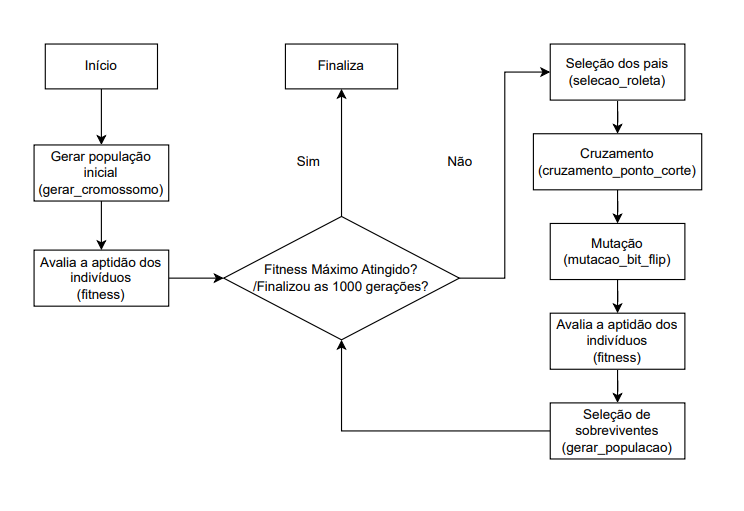

Nota: Para permitir reprodutibilidade do experimento apresentado, foi definido uma seed com valor = 10. 

Caso seja de interesse gerar novos resultados, basta alterar ou remover a seed.

    IMPORTANTE: EM CASOS DE ALTERAÇÃO DO CÓDIGO, FAVOR RE-EXECUTAR TODAS AS CÉLULAS ABAIXO DELE. 

In [73]:
from random import *
import time
import numpy as np

# Constantes
SEED=10 # MUDAR SEED AQUI
TAMANHO_POPULACAO = 20
PROBABILIDADE_MUTACAO = 0.03
TAXA_CRUZAMENTO = 0.8
NUMERO_GERACOES = 1000
n = 8

seed(SEED)

state = [0] * N
board = [[0 for _ in range(N)] for _ in range(N)]

# Seleção dos pais
def selecao_roleta(populacao: list[int], valores_fitness: list[int], tamanho_populacao: int) -> list[int]:
    soma_fitness = sum(valores_fitness)
    prob_fitness = [(fitness / soma_fitness) for fitness in valores_fitness]
    posicao_roda = uniform(0, 1)
    prob_cumulativa = 0

    for i in range(tamanho_populacao):
        prob_cumulativa += prob_fitness[i]
        if prob_cumulativa >= posicao_roda:
            return populacao[i]

# Conversor decimal para binário
def decimal_para_binario(cromossomo: list[int]) -> list[int]:
    cromossomo_binario = []
    for num in cromossomo:
        rep_binaria = format(num, '03b')  # Sempre gera exatamente 3 bits
        cromossomo_binario.extend([int(bit) for bit in rep_binaria])
    return cromossomo_binario

# Conversor binário para decimal
def binario_para_decimal(cromossomo: list[int], tamanho: int = 8) -> list[int]:

    cromossomo_decimal = []
    for i in range(0, tamanho * 3, 3):  # Itera em blocos de 3 bits
        valor_decimal = cromossomo[i] * 4 + cromossomo[i+1] * 2 + cromossomo[i+2]
        cromossomo_decimal.append(valor_decimal)

    return cromossomo_decimal

# Mutação
def mutacao_bit_flip(cromossomo: list[int]) -> list[int]:

    # Converter de decimal para binário
    cromossomo_binario = decimal_para_binario(cromossomo)

    # Seleciona um índice aleatório do cromossomo binário
    index = randint(0, len(cromossomo_binario) - 1)

    # Realiza o flip do bit selecionado
    cromossomo_binario[index] = 1 - cromossomo_binario[index]

    # Converter de binário para decimal
    cromossomo_decimal = binario_para_decimal(cromossomo_binario)

    return cromossomo_decimal

# Cruzamento
def cruzamento_ponto_corte(cromossomo1: list[int], cromossomo2: list[int], tamanho: int) -> tuple[list[int], list[int]]:

    ponto = randint(1, tamanho-2)

    filho1 = cromossomo1[:ponto] + cromossomo2[ponto:]
    filho2 = cromossomo2[:ponto] + cromossomo1[ponto:]

    return filho1, filho2

# Cromossomo
def gerar_cromossomo(tamanho: int):
    return sample(range(0, tamanho), tamanho)

# Gerar a população
def gerar_populacao(tamanho_populacao: int, tamanho_cromossomo: int, probabilidade_mutacao: float, taxa_cruzamento: float, antiga_populacao: list[list[int]], valores_fitness: list[list[int]]) -> list[list[int]]:

    nova_populacao = []

    for _ in range(int(tamanho_populacao / 2)):
        pai1 = selecao_roleta(antiga_populacao, valores_fitness, tamanho_populacao)
        pai2 = selecao_roleta(antiga_populacao, valores_fitness, tamanho_populacao)

        # Aplicação da taxa de cruzamento
        if random() <= taxa_cruzamento:
            filho1, filho2 = cruzamento_ponto_corte(pai1, pai2, tamanho_cromossomo)
        else:
            filho1, filho2 = pai1, pai2

        # Aplicação da taxa de mutação
        if random() <= probabilidade_mutacao:
            filho1 = mutacao_bit_flip(filho1)
        if random() <= probabilidade_mutacao:
            filho2 = mutacao_bit_flip(filho2)

        # Nova população
        nova_populacao.append(filho1)
        nova_populacao.append(filho2)

    return nova_populacao

# Fitness
def fitness(n: int, cromossomo: list[int], fitness_max: int) -> int:

    conflitos = 0

    for i in range(n):
        for j in range(i + 1, n):
            if cromossomo[i] == cromossomo[j] or abs(cromossomo[i] - cromossomo[j]) == abs(i - j):
                conflitos += 1

    return int(fitness_max - conflitos)

def queen_problem(n: int):
    
    fitness_max = (n * (n - 1)) / 2
    geracao = 0

    # Gerar a população inicial
    populacao = [gerar_cromossomo(n) for _ in range(TAMANHO_POPULACAO)]
    
    # Avalia o valor fitness para cada cromossomo
    valores_fitness = [fitness(n, cromossomo, fitness_max) for cromossomo in populacao]
    
    mais_apto_encontrado = populacao[valores_fitness.index(max(valores_fitness))]

    while geracao != NUMERO_GERACOES and fitness_max != fitness(n, mais_apto_encontrado, fitness_max):
        populacao = gerar_populacao(TAMANHO_POPULACAO, n, PROBABILIDADE_MUTACAO, TAXA_CRUZAMENTO, populacao, valores_fitness)
        valores_fitness = [fitness(n, cromossomo, fitness_max) for cromossomo in populacao]
        
        mais_apto_atual = populacao[valores_fitness.index(max(valores_fitness))]
        
        if fitness(n, mais_apto_atual, fitness_max) > fitness(n, mais_apto_encontrado, fitness_max):
            mais_apto_encontrado = mais_apto_atual

        geracao += 1

        # Checa se tem uma solução na ultima população para mostrar 
    if fitness_max in valores_fitness:
      print(f"Solucionado na geração:{geracao}") 
      solucao = populacao[valores_fitness.index(fitness_max)]
      print(f"Solução encontrada = {solucao} \n")
      generateBoard(board, state=solucao)
      rainhas_atacando=calculateObjective(board, state=solucao)
      return geracao, solucao, rainhas_atacando
    else:
      print(f"Nenhuma solução encontrada em {NUMERO_GERACOES} gerações!!") 
      print(f"Solução mais apta encontrada: {mais_apto_encontrado} \n")
      generateBoard(board, state=mais_apto_atual)
      rainhas_atacando=calculateObjective(board, state=mais_apto_atual)
      return geracao, mais_apto_encontrado, rainhas_atacando

# Função principal para rodar o experimento
def executar_algoritmo(num_execucoes: int):
    iteracoes = []
    tempos_execucao = []
    solucao_list = []
    ranking_dict = {}
    # Coletar informações
    for _ in range(num_execucoes):
        inicio = time.time()
        iteracoes_ate_parar, solucao_, rainhas_atacando = queen_problem(n)
        fim = time.time()
        
        solucao_list.append(solucao_)
        iteracoes.append(iteracoes_ate_parar)
        tempos_execucao.append(fim - inicio)

        if rainhas_atacando not in ranking_dict:
            ranking_dict[rainhas_atacando] = [(solucao_, iteracoes_ate_parar)]
        else:
            ranking_dict[rainhas_atacando].append((solucao_, iteracoes_ate_parar))
        #print(dict(sorted(ranking_dict.items())))

    return iteracoes, tempos_execucao, ranking_dict
iteracoes, tempos_execucao, ranking_dict = executar_algoritmo(50)

# Cálculo das médias e desvio padrão
media_iteracoes = np.mean(iteracoes)
desvio_iteracoes = np.std(iteracoes)
media_tempo = np.mean(tempos_execucao)
desvio_tempo = np.std(tempos_execucao)

count = 0
print('Ranking do 5 melhores')
for key, values in dict(sorted(ranking_dict.items())).items():
    for value in values:
        if count >= 5:
            break
        print(f'Numero de rainhas se atacando:{key} | Array da rainha:{value[0]} | Gerações necessárias para alcançar o resultado: {value[1]}')
        count += 1

print(f"Média de iterações do número mínimo de iterações: {media_iteracoes}")
print(f"Desvio padrão do número mínimo de iterações: {desvio_iteracoes}")
print(f"Média de tempo de execução: {media_tempo} segundos") 
print(f"Desvio padrão do tempo de execução: {desvio_tempo} segundos")

# Rodar o experimento


Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [6, 0, 7, 4, 1, 5, 2, 3] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [2, 4, 6, 1, 5, 7, 0, 3] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [5, 1, 6, 4, 7, 2, 0, 3] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [2, 7, 6, 1, 3, 5, 0, 4] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [3, 1, 7, 5, 2, 0, 4, 6] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [5, 2, 3, 7, 0, 4, 6, 1] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [7, 1, 6, 0, 2, 7, 5, 3] 

Solucionado na geração:184
Solução encontrada = [6, 3, 1, 4, 7, 0, 2, 5] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [2, 4, 7, 0, 3, 6, 0, 5] 

Solucionado na geração:0
Solução encontrada = [4, 6, 1, 5, 2, 0, 3, 7] 

Nenhuma solução encontrada e

### Resultados


    IMPORTANTE: EM CASOS DE ALTERAÇÃO DO CÓDIGO, FAVOR RE-EXECUTAR TODAS AS CÉLULAS ABAIXO DELE. 

Ranking dos 5 melhores

In [74]:
count = 0
print('Ranking do 5 melhores')
for key, values in dict(sorted(ranking_dict.items())).items():
    for value in values:
        if count >= 5:
            break
        print(f'Numero de rainhas se atacando:{key} | Array da rainha:{value[0]} | Gerações necessárias para alcançar o resultado: {value[1]}')
        count += 1

Ranking do 5 melhores
Numero de rainhas se atacando:0 | Array da rainha:[6, 3, 1, 4, 7, 0, 2, 5] | Gerações necessárias para alcançar o resultado: 184
Numero de rainhas se atacando:0 | Array da rainha:[4, 6, 1, 5, 2, 0, 3, 7] | Gerações necessárias para alcançar o resultado: 0
Numero de rainhas se atacando:0 | Array da rainha:[1, 5, 7, 2, 0, 3, 6, 4] | Gerações necessárias para alcançar o resultado: 695
Numero de rainhas se atacando:0 | Array da rainha:[1, 6, 4, 7, 0, 3, 5, 2] | Gerações necessárias para alcançar o resultado: 191
Numero de rainhas se atacando:0 | Array da rainha:[3, 6, 2, 7, 1, 4, 0, 5] | Gerações necessárias para alcançar o resultado: 771


Média e Desvio Padrão do número mínimo de iterações: 

In [75]:
print(f"Média de iterações do número mínimo de iterações: {media_iteracoes}")
print(f"Desvio padrão do número mínimo de iterações: {desvio_iteracoes}")

Média de iterações do número mínimo de iterações: 936.82
Desvio padrão do número mínimo de iterações: 212.8951563563624


Média e Desvio Padrão do tempo de execução:

In [76]:
print(f"Média de tempo de execução: {media_tempo} segundos") 
print(f"Desvio padrão do tempo de execução: {desvio_tempo} segundos")

Média de tempo de execução: 0.1742406368255615 segundos
Desvio padrão do tempo de execução: 0.040202997237855115 segundos
